In [1]:
import sys
sys.path.append('../../src')
from modules import *
from columns import *

In [2]:
data=pd.read_csv('../../data/PAH_PCB_OCP.csv',index_col=0)
report=pd.read_csv('../../data/VEGA_report.csv',index_col=0)

In [3]:
novi_nazivi = ["alfa-HCH",
              "beta-HCH",
              "gama-HCH"]
report.loc[12, 'tId'] = novi_nazivi[0] 
report.loc[13, 'tId'] = novi_nazivi[1]
report.loc[14, 'tId'] = novi_nazivi[2]

In [4]:
new_smiles = ["Cl[C@H]1[C@@H](Cl)[C@H](Cl)[C@H](Cl)[C@@H](Cl)[C@@H]1Cl",
              "Cl[C@H]1[C@H](Cl)[C@@H](Cl)[C@H](Cl)[C@@H](Cl)[C@@H]1Cl",
              "Cl[C@H]1[C@H](Cl)[C@@H](Cl)[C@@H](Cl)[C@H](Cl)[C@H]1Cl"]
report.loc[12, 'SMILES'] = new_smiles[0] 
report.loc[13, 'SMILES'] = new_smiles[1]
report.loc[14, 'SMILES'] = new_smiles[2]

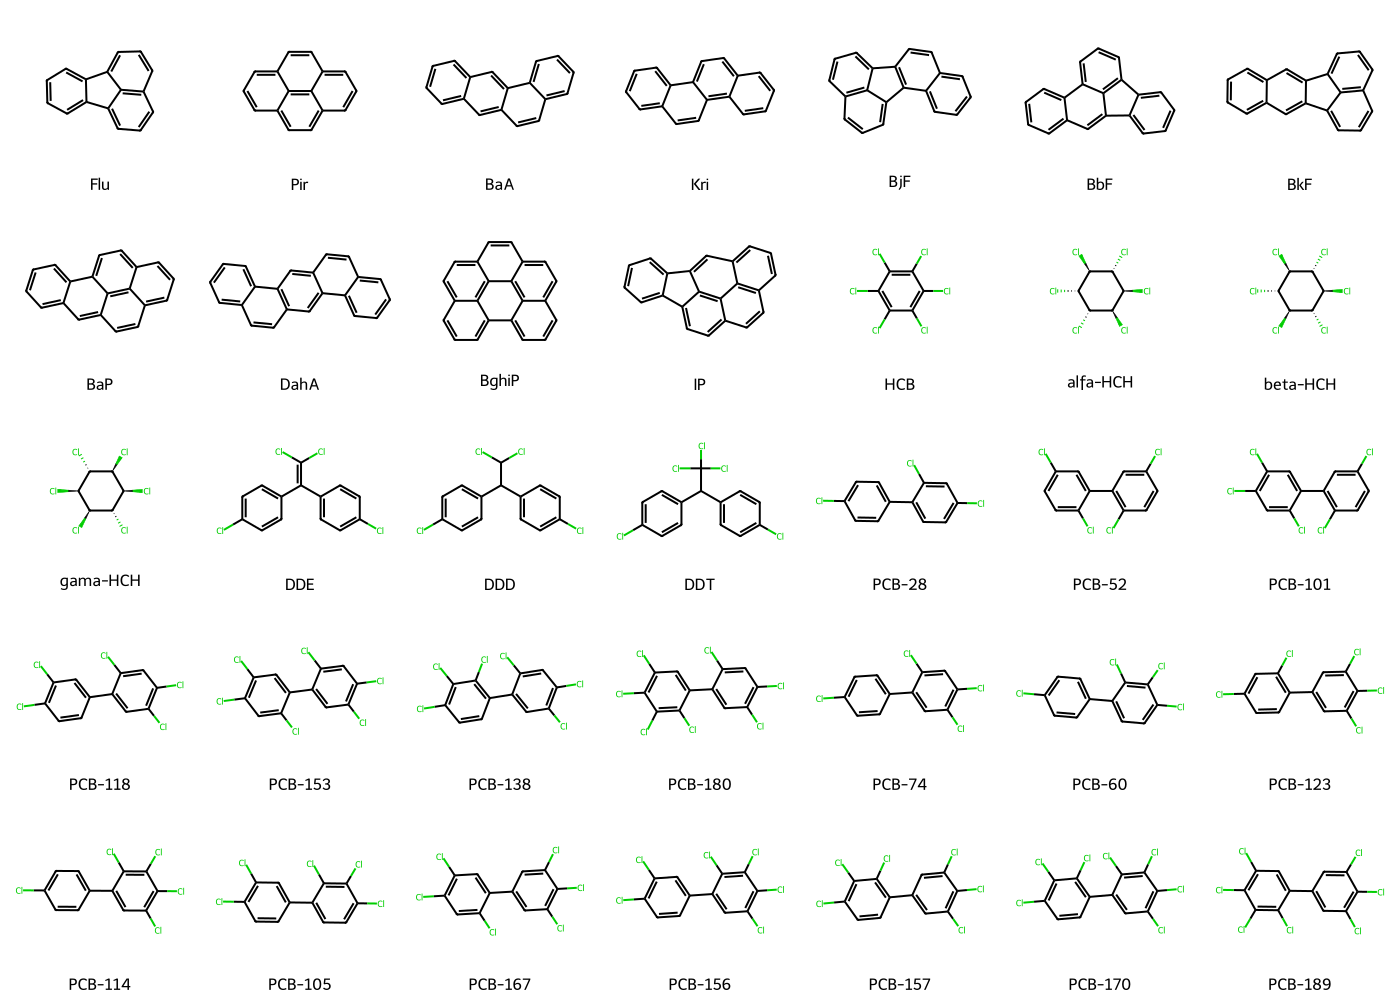

In [8]:
smiles_list=report['SMILES']
molecule_names=report['tId'].to_list()

molecules=[Chem.MolFromSmiles(smiles) for smiles in smiles_list]

img=Draw.MolsToGridImage(molecules, molsPerRow=7, legends=molecule_names)
img


In [10]:
from PIL import Image
import io

# Your previous code for generating the image
# ...

# Convert RDKit image to a bytes-like object
img_byte_arr = io.BytesIO()
img.save(img_byte_arr, format='PNG')
img_byte_arr = img_byte_arr.getvalue()

# Convert bytes-like object to a PIL image
pil_img = Image.open(io.BytesIO(img_byte_arr))

# Save the PIL image to a file
img_path = '../../data/molekule.jpg'  # specify your desired path
pil_img.save(img_path, 'JPEG')


AttributeError: 'Image' object has no attribute 'save'